In [59]:
#Conect with drive to upload the data
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [80]:

#Import all necessary packs
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Carregar dados do Golfo do México
Golfo_Mexico = np.loadtxt('/content/drive/MyDrive/Reservoir Mechanichs/HW1_result_gom.txt')
df_golfo_mexico = pd.DataFrame({
    'depth': Golfo_Mexico[:, 0],
    'sv': Golfo_Mexico[:, 1],
    'porosidade': Golfo_Mexico[:, 2]
})

# Carregar dados do Barnett Shale
Barnett_Shale = np.loadtxt('/content/drive/MyDrive/Reservoir Mechanichs/HW1_result_barnett.txt')
df_barnett_shale = pd.DataFrame({
    'depth': Barnett_Shale[:, 0],
    'sv': Barnett_Shale[:, 1],
    'porosidade': Barnett_Shale[:, 2]
})



In [81]:

# variáveis
pp_hydro_grad = 0.44 # psi/ft
poro_0 = 0.4 #%
beta = 0.0002 #psi
depth_to_seabed = 1000 # ft



In [82]:
# Função para calcular sv_effective
def calcular_pp_hydro(df):
    df['pp_hydro'] = df['depth'] * 0.44

# Aplicar a função aos DataFrames
calcular_pp_hydro(df_golfo_mexico)
calcular_pp_hydro(df_barnett_shale)

# Função para calcular sv_effective
def calcular_sv_effective(df):
    df['sv_effective'] = df['sv'] - df['pp_hydro']

# Aplicar a função aos DataFrames
calcular_sv_effective(df_golfo_mexico)
calcular_sv_effective(df_barnett_shale)

# Função para calcular a porosidade empírica
def calcular_porosidade_empirica(df):
    df['porosidade_empirica'] = poro_0 * np.exp(-beta * df['sv_effective'])

# Aplicar a função aos DataFrames
calcular_porosidade_empirica(df_golfo_mexico)
calcular_porosidade_empirica(df_barnett_shale)

# Visualizar os resultados
print("DataFrame do Golfo do México:")
print(df_golfo_mexico.head())

print("\nDataFrame do Barnett Shale:")
print(df_barnett_shale.head())

DataFrame do Golfo do México:
      depth         sv  porosidade   pp_hydro  sv_effective  \
0   0.00000   0.000000         1.0   0.000000      0.000000   
1  10.10101   4.376104         1.0   4.444444     -0.068340   
2  20.20202   8.752208         1.0   8.888889     -0.136681   
3  30.30303  13.128312         1.0  13.333333     -0.205021   
4  40.40404  17.504416         1.0  17.777778     -0.273361   

   porosidade_empirica  
0             0.400000  
1             0.400005  
2             0.400011  
3             0.400016  
4             0.400022  

DataFrame do Barnett Shale:
      depth        sv  porosidade  pp_hydro  sv_effective  porosidade_empirica
0  0.000000  0.000000    0.483647  0.000000      0.000000             0.400000
1  1.015152  0.825854    0.483647  0.446667      0.379187             0.399970
2  2.030303  1.651707    0.483647  0.893333      0.758374             0.399939
3  3.045455  2.477561    0.483647  1.340000      1.137561             0.399909
4  4.060606  3.30

In [83]:

df_golfo_mexico.head()

,depth,sv,porosidade,pp_hydro,sv_effective,porosidade_empirica
0,0.00000,0.000000,1.0,0.000000,0.000000,0.400000
1,10.10101,4.376104,1.0,4.444444,-0.068340,0.400005
2,20.20202,8.752208,1.0,8.888889,-0.136681,0.400011
3,30.30303,13.128312,1.0,13.333333,-0.205021,0.400016
4,40.40404,17.504416,1.0,17.777778,-0.273361,0.400022


In [84]:

# Função para calcular a porosidade empírica
def calcular_porosidade_empirica(df):
    df['porosidade_empirica'] = poro_0 * np.exp(-beta * df['sv_effective'])

# Aplicar a função aos DataFrames
calcular_porosidade_empirica(df_golfo_mexico)
calcular_porosidade_empirica(df_barnett_shale)

# Visualizar os resultados
print("DataFrame do Golfo do México:")
print(df_golfo_mexico.head())

print("\nDataFrame do Barnett Shale:")
print(df_barnett_shale.head())

DataFrame do Golfo do México:
      depth         sv  porosidade   pp_hydro  sv_effective  \
0   0.00000   0.000000         1.0   0.000000      0.000000   
1  10.10101   4.376104         1.0   4.444444     -0.068340   
2  20.20202   8.752208         1.0   8.888889     -0.136681   
3  30.30303  13.128312         1.0  13.333333     -0.205021   
4  40.40404  17.504416         1.0  17.777778     -0.273361   

   porosidade_empirica  
0             0.400000  
1             0.400005  
2             0.400011  
3             0.400016  
4             0.400022  

DataFrame do Barnett Shale:
      depth        sv  porosidade  pp_hydro  sv_effective  porosidade_empirica
0  0.000000  0.000000    0.483647  0.000000      0.000000             0.400000
1  1.015152  0.825854    0.483647  0.446667      0.379187             0.399970
2  2.030303  1.651707    0.483647  0.893333      0.758374             0.399939
3  3.045455  2.477561    0.483647  1.340000      1.137561             0.399909
4  4.060606  3.30

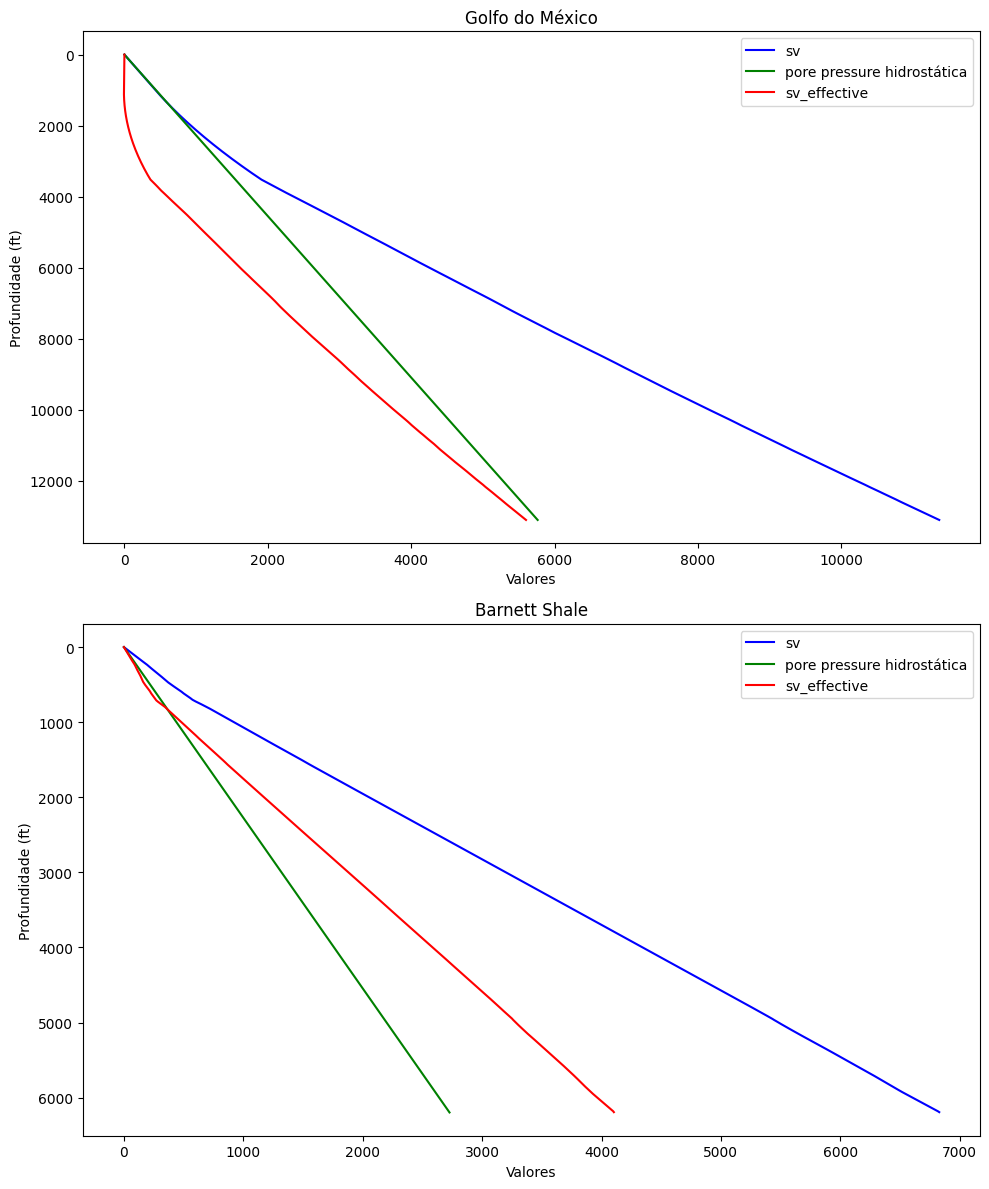

In [85]:
# Configurar os gráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Gráfico para o Golfo do México
ax1.plot(df_golfo_mexico['sv'], df_golfo_mexico['depth'], label='sv', color='blue')
ax1.plot(df_golfo_mexico['pp_hydro'], df_golfo_mexico['depth'], label='pore pressure hidrostática', color='green')
ax1.plot(df_golfo_mexico['sv_effective'], df_golfo_mexico['depth'], label='sv_effective', color='red')
ax1.set_title('Golfo do México')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Profundidade (ft)')
ax1.legend()

# Inverter o eixo y
ax1.invert_yaxis()

# Gráfico para o Barnett Shale
ax2.plot(df_barnett_shale['sv'], df_barnett_shale['depth'], label='sv', color='blue')
ax2.plot(df_barnett_shale['pp_hydro'], df_barnett_shale['depth'], label='pore pressure hidrostática', color='green')
ax2.plot(df_barnett_shale['sv_effective'], df_barnett_shale['depth'], label='sv_effective', color='red')
ax2.set_title('Barnett Shale')
ax2.set_xlabel('Valores')
ax2.set_ylabel('Profundidade (ft)')
ax2.legend()

# Inverter o eixo y
ax2.invert_yaxis()

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()


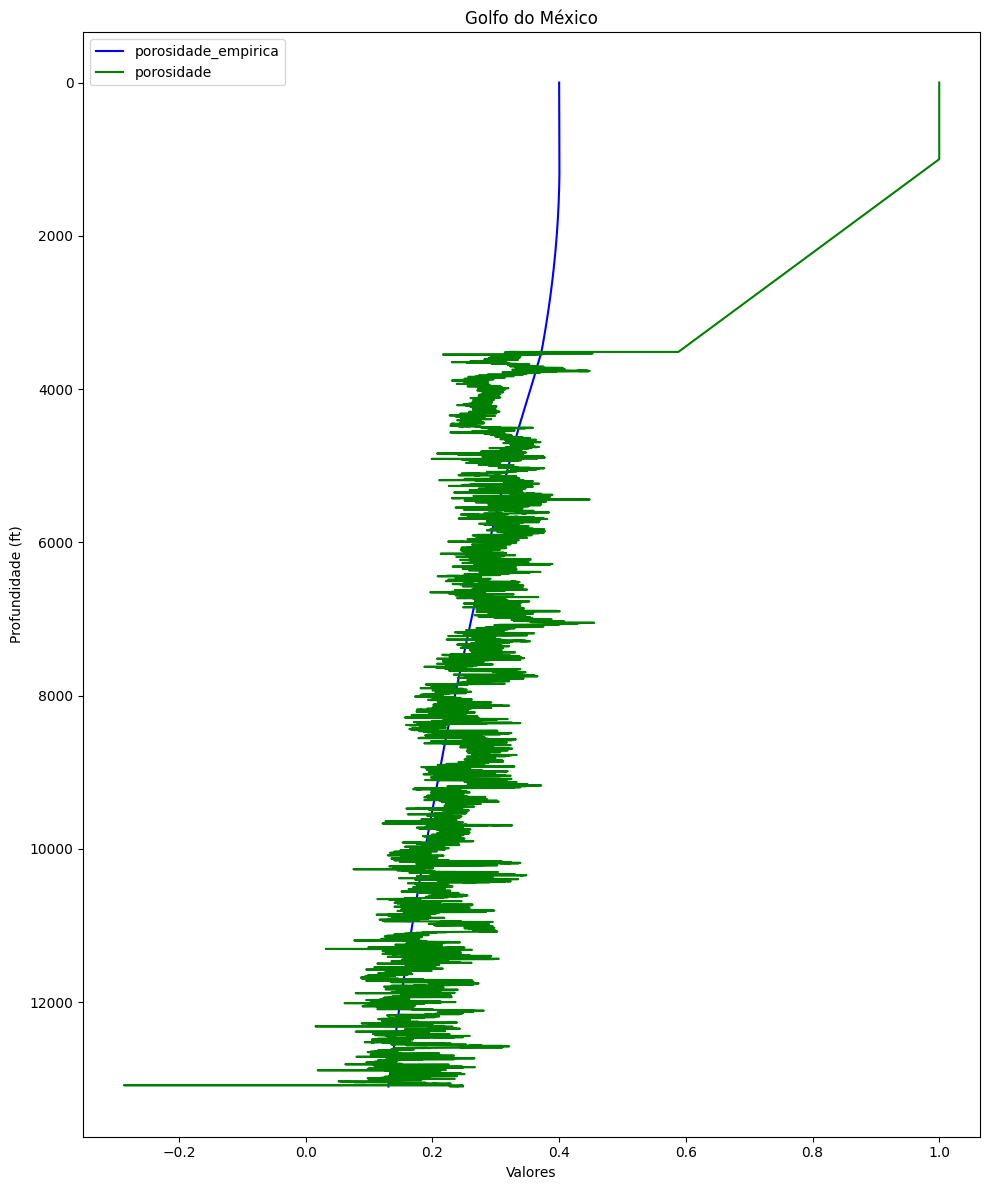

In [86]:
# Configurar os gráficos
fig, ax1 = plt.subplots(figsize=(10, 12))

# Gráfico para o Golfo do México
ax1.plot(df_golfo_mexico['porosidade_empirica'], df_golfo_mexico['depth'], label='porosidade_empirica', color='blue')
ax1.plot(df_golfo_mexico['porosidade'], df_golfo_mexico['depth'], label='porosidade', color='green')
ax1.set_title('Golfo do México')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Profundidade (ft)')
ax1.legend()

# Inverter o eixo y
ax1.invert_yaxis()


# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


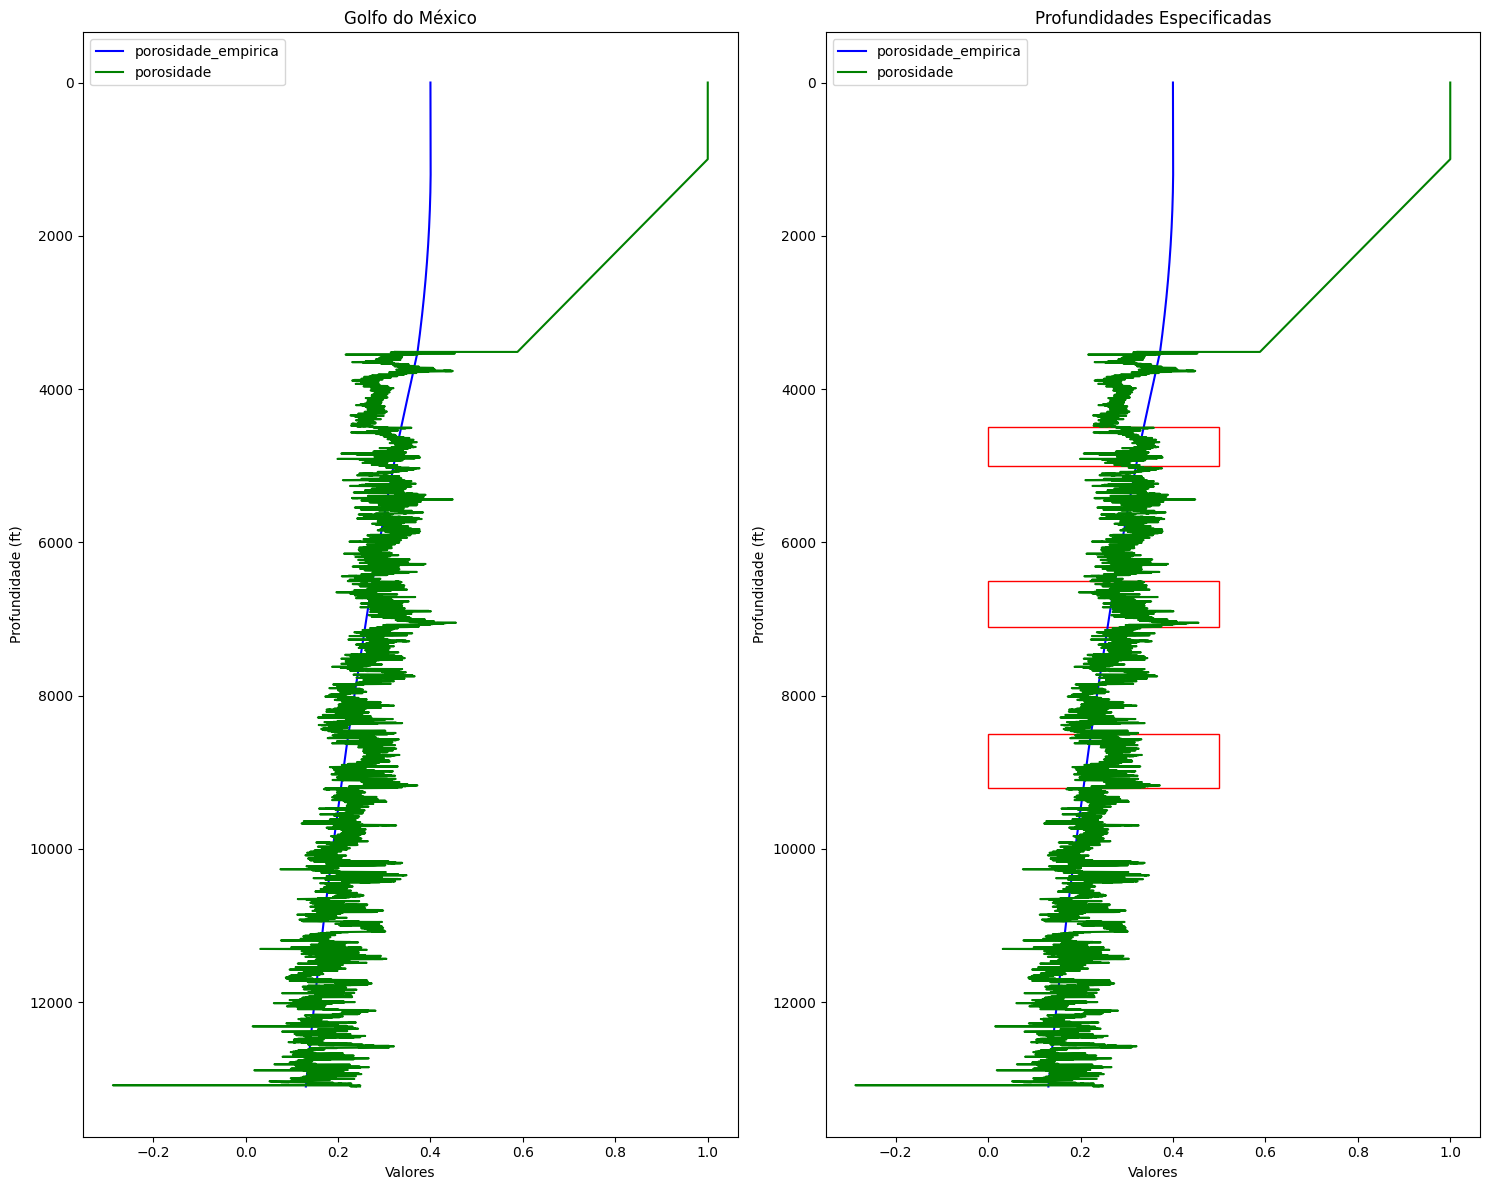

In [87]:
# Configurar os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 12))

# Gráfico para o Golfo do México
ax1.plot(df_golfo_mexico['porosidade_empirica'], df_golfo_mexico['depth'], label='porosidade_empirica', color='blue')
ax1.plot(df_golfo_mexico['porosidade'], df_golfo_mexico['depth'], label='porosidade', color='green')
ax1.set_title('Golfo do México')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Profundidade (ft)')
ax1.legend()
ax1.invert_yaxis()

# Gráfico para as profundidades especificadas
ax2.plot(df_golfo_mexico['porosidade_empirica'], df_golfo_mexico['depth'], label='porosidade_empirica', color='blue')
ax2.plot(df_golfo_mexico['porosidade'], df_golfo_mexico['depth'], label='porosidade', color='green')
ax2.set_title('Profundidades Especificadas')
ax2.set_xlabel('Valores')
ax2.set_ylabel('Profundidade (ft)')
ax2.legend()
ax2.invert_yaxis()

# Adicionar retângulo vermelho destacado nas profundidades específicas
rect = patches.Rectangle((0, 4500), 0.5, 500, linewidth=1, edgecolor='red', facecolor='none', label='Destacado')
ax2.add_patch(rect)

rect = patches.Rectangle((0, 6500), 0.5, 600, linewidth=1, edgecolor='red', facecolor='none')
ax2.add_patch(rect)

rect = patches.Rectangle((0, 8500), 0.5, 700, linewidth=1, edgecolor='red', facecolor='none')
ax2.add_patch(rect)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

II. Estimate the magnitude of Gulf of Mexico overpressure
---
1. Rearrange the equation in I to obtain an expression for pore pressure as a function of
porosity. Calculate the pore pressure using the density porosity and the overburden stress
φ = φ0
e
−βσ V
which are obtained in HW1. Plot this calculated pore pressure as well as the hydrostatic
pore pressure and the overburden stress versus depth on the same plot.
2. By subtracting hydrostatic pore pressure from the calculated pore pressure using porosity
data, estimate the magnitude of the overpressure in the GOM data set

φ = φ0 e ^ −βσ V

φ = φ0 e ^−β (Sv-Pp)

ln φ = ln φ0 ln e ^−β * (Sv-Pp)

ln φ = ln φ0 l 1*[−β * (Sv-Pp)]

(*-1) ln φ = ln φ0 −β * (Sv-Pp) (*-1)

 - ln φ = - ln φ0 β * (Sv-Pp)

 - ln φ + ln φ0 = β * (Sv-Pp)

 - ln φ/β + ln φ0/β =  Sv-Pp

  [(-ln φ + ln φ0)/β] =  Sv-Pp

 (*-1) [(-ln φ + ln φ0)/β] - Sv = - Pp (*-1)

 Sv - [(-ln φ + ln φ0)/β] = Pp

In [88]:
def calcular_Pp(df, poro_0, beta):
    df['Pp'] = df['sv'] - ((-np.log(df['porosidade']) + np.log(poro_0)) / beta)
    return df
# Aplicar a função aos DataFrames
calcular_Pp(df_golfo_mexico, poro_0, beta)
calcular_Pp(df_barnett_shale, poro_0, beta)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,depth,sv,porosidade,pp_hydro,sv_effective,porosidade_empirica,Pp
0,0.000000,0.000000,0.483647,0.000000,0.000000,0.400000,949.454381
1,1.015152,0.825854,0.483647,0.446667,0.379187,0.399970,950.280235
2,2.030303,1.651707,0.483647,0.893333,0.758374,0.399939,951.106089
3,3.045455,2.477561,0.483647,1.340000,1.137561,0.399909,951.931942
4,4.060606,3.303414,0.483647,1.786667,1.516748,0.399879,952.757796
...,...,...,...,...,...,...,...
12290,6195.500000,NaN,NaN,2726.020000,NaN,NaN,NaN
12291,6196.000000,NaN,NaN,2726.240000,NaN,NaN,NaN
12292,6196.500000,NaN,NaN,2726.460000,NaN,NaN,NaN
12293,6197.000000,NaN,NaN,2726.680000,NaN,NaN,NaN


In [89]:
df_golfo_mexico.head()

,depth,sv,porosidade,pp_hydro,sv_effective,porosidade_empirica,Pp
0,0.00000,0.000000,1.0,0.000000,0.000000,0.400000,4581.453659
1,10.10101,4.376104,1.0,4.444444,-0.068340,0.400005,4585.829763
2,20.20202,8.752208,1.0,8.888889,-0.136681,0.400011,4590.205868
3,30.30303,13.128312,1.0,13.333333,-0.205021,0.400016,4594.581972
4,40.40404,17.504416,1.0,17.777778,-0.273361,0.400022,4598.958076


In [90]:
print(df_golfo_mexico['Pp'])

0       4581.453659
1       4585.829763
2       4590.205868
3       4594.581972
4       4598.958076
           ...     
9781    8530.336941
9782    8531.339445
9783    8784.912235
9784    8785.906074
9785    8968.291786
Name: Pp, Length: 9786, dtype: float64


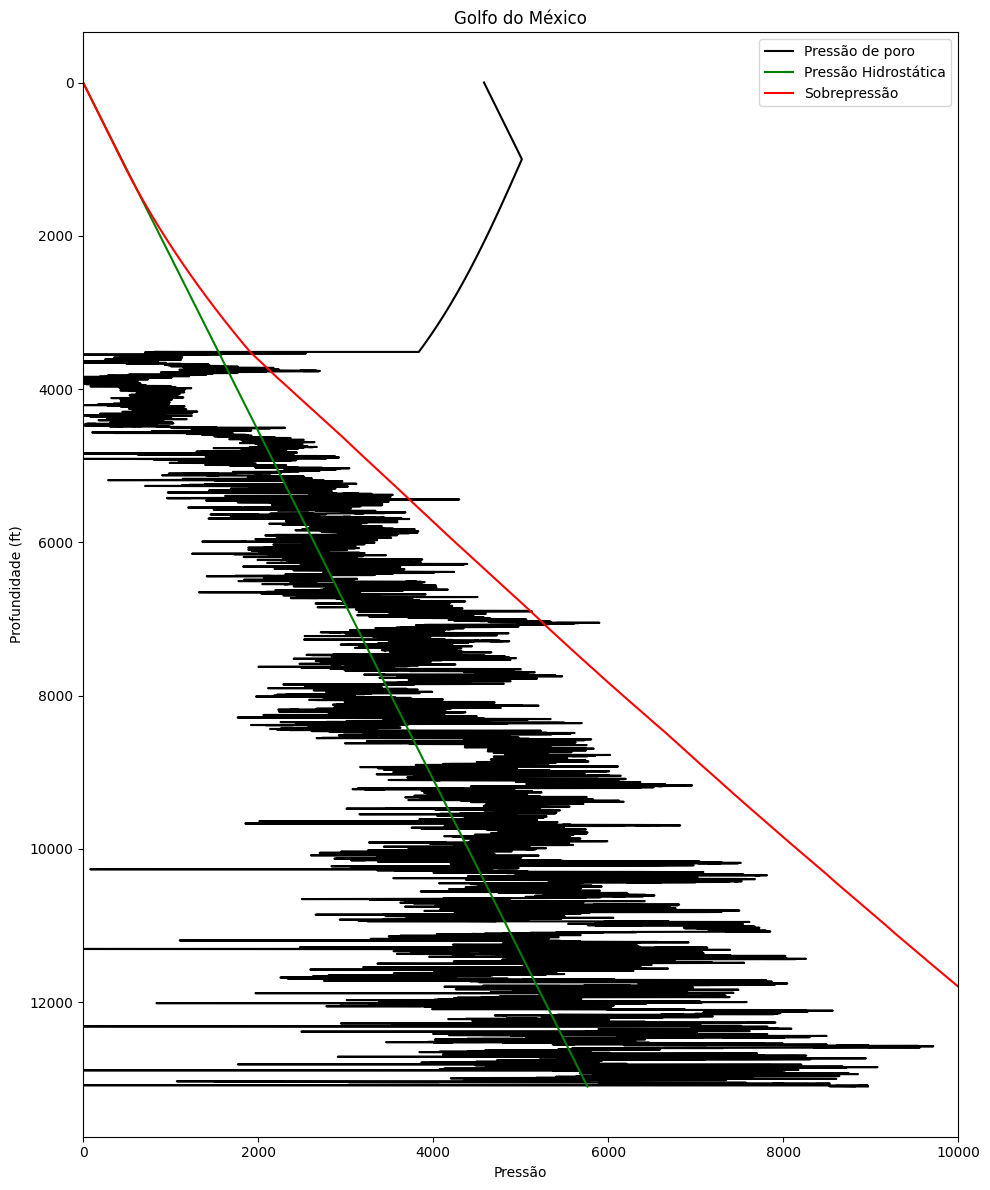

In [91]:
# Configurar os gráficos
fig, ax1 = plt.subplots(figsize=(10, 12))

# Gráfico para o Golfo do México
ax1.plot(df_golfo_mexico['Pp'], df_golfo_mexico['depth'], label='Pressão de poro', color='black')
ax1.plot(df_golfo_mexico['pp_hydro'], df_golfo_mexico['depth'], label='Pressão Hidrostática', color='green')
ax1.plot(df_golfo_mexico['sv'], df_golfo_mexico['depth'], label='Sobrepressão', color='red')
ax1.set_title('Golfo do México')
ax1.set_xlabel('Pressão')
ax1.set_ylabel('Profundidade (ft)')
ax1.legend()
#limite do eixo x
ax1.set_xlim(0, 10000)

# Inverter o eixo y
ax1.invert_yaxis()


# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [92]:
def calcular_gradiente_pressao(df):
    df['gp'] = df['Pp'] - df['pp_hydro']
    return df
# Aplicar a função aos DataFrames
calcular_gradiente_pressao(df_golfo_mexico)
calcular_gradiente_pressao(df_barnett_shale)

,depth,sv,porosidade,pp_hydro,sv_effective,porosidade_empirica,Pp,gp
0,0.000000,0.000000,0.483647,0.000000,0.000000,0.400000,949.454381,949.454381
1,1.015152,0.825854,0.483647,0.446667,0.379187,0.399970,950.280235,949.833568
2,2.030303,1.651707,0.483647,0.893333,0.758374,0.399939,951.106089,950.212755
3,3.045455,2.477561,0.483647,1.340000,1.137561,0.399909,951.931942,950.591942
4,4.060606,3.303414,0.483647,1.786667,1.516748,0.399879,952.757796,950.971129
...,...,...,...,...,...,...,...,...
12290,6195.500000,NaN,NaN,2726.020000,NaN,NaN,NaN,NaN
12291,6196.000000,NaN,NaN,2726.240000,NaN,NaN,NaN,NaN
12292,6196.500000,NaN,NaN,2726.460000,NaN,NaN,NaN,NaN
12293,6197.000000,NaN,NaN,2726.680000,NaN,NaN,NaN,NaN


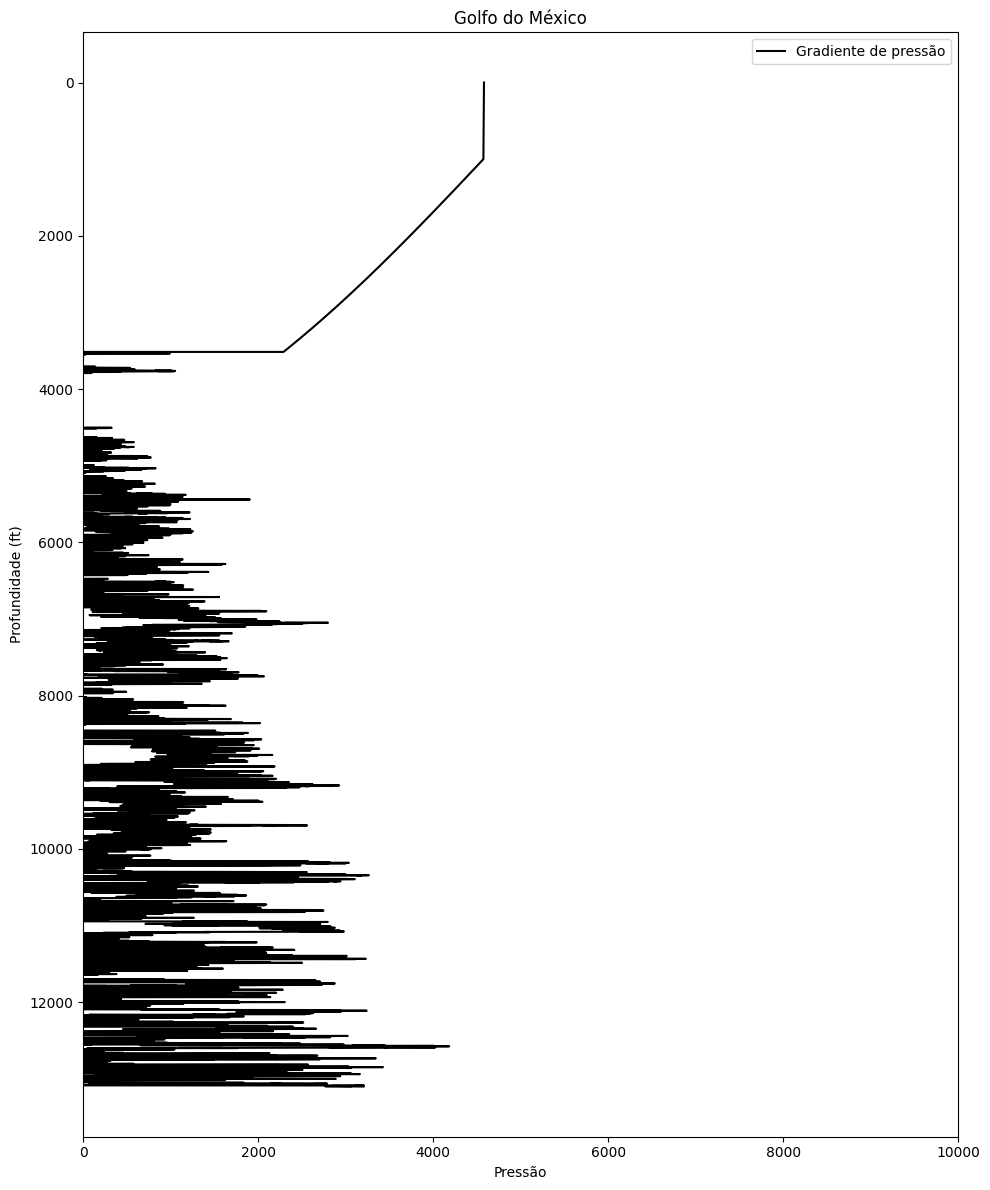

In [94]:
# Configurar os gráficos
fig, ax1 = plt.subplots(figsize=(10, 12))

# Gráfico para o Golfo do México
ax1.plot(df_golfo_mexico['gp'], df_golfo_mexico['depth'], label='Gradiente de pressão', color='black')
ax1.set_title('Golfo do México')
ax1.set_xlabel('Pressão')
ax1.set_ylabel('Profundidade (ft)')
ax1.legend()
#limite do eixo x
ax1.set_xlim(0, 10000)

# Inverter o eixo y
ax1.invert_yaxis()


# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [101]:
#respondendo as perguntas:
#questão 2a
# Encontrar o valor de Pp na profundidade desejada
valor_Pp_6000 = df_golfo_mexico.loc[df_golfo_mexico['depth'] == 6000, 'Pp'].values[0]
print(f'O valor de Pp na profundidade de 6000 é: {valor_Pp_6000}')
#questão 2b
# Encontrar o valor de Pp na profundidade desejada
valor_Pp_10000 = df_golfo_mexico.loc[df_golfo_mexico['depth'] == 10000, 'Pp'].values[0]
print(f'O valor de Pp na profundidade de 10000 é: {valor_Pp_10000}')
#questão 3a
# Profundidade desejada
profundidade_desejada = 6000
# Calcular Pp dividido pela profundidade na profundidade desejada
resultado_divisao = df_golfo_mexico.query(f'depth == {profundidade_desejada}')['Pp'] / profundidade_desejada
print(f'O resultado da divisão é: {resultado_divisao.values[0]}')
#Questão 3b
profundidade_desejada = 10000
# Calcular Pp dividido pela profundidade na profundidade desejada
resultado_divisao = df_golfo_mexico.query(f'depth == {profundidade_desejada}')['Pp'] / profundidade_desejada
print(f'O resultado da divisão é: {resultado_divisao.values[0]}')

#questão 5
# Encontrar o valor de gp na profundidade desejada
valor_gp_9000 = df_golfo_mexico.loc[df_golfo_mexico['depth'] == 9000, 'gp'].values[0]
print(f'O valor de Pp na profundidade de 10000 é: {valor_gp_9000}')

O valor de Pp na profundidade de 6000 é: 2512.7179996457994
O valor de Pp na profundidade de 10000 é: 4634.064164851745
O resultado da divisão é: 0.4187863332742999
O resultado da divisão é: 0.4634064164851745
O valor de Pp na profundidade de 10000 é: 130.4384161842704
